In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [239]:
data = pd.read_csv('depression_anxiety_data.csv')
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    783 non-null    int64  
 1   school_year           783 non-null    int64  
 2   age                   783 non-null    int64  
 3   gender                783 non-null    object 
 4   bmi                   783 non-null    float64
 5   who_bmi               783 non-null    object 
 6   phq_score             783 non-null    int64  
 7   depression_severity   779 non-null    object 
 8   depressiveness        780 non-null    object 
 9   suicidal              782 non-null    object 
 10  depression_diagnosis  782 non-null    object 
 11  depression_treatment  779 non-null    object 
 12  gad_score             783 non-null    int64  
 13  anxiety_severity      783 non-null    object 
 14  anxiousness           777 non-null    object 
 15  anxiety_diagnosis     7

In [240]:
label_encoder = LabelEncoder()
data['anxiety_severity'] = label_encoder.fit_transform(data['anxiety_severity'])
data['depression_severity'] = label_encoder.fit_transform(data['depression_severity'])

In [241]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['who_bmi'] = label_encoder.fit_transform(data['who_bmi'])

In [242]:
data = data.drop(columns=['id']) #removing ID column, since we dont need it


In [243]:
data.fillna(0, inplace=True) #replaces null value with 0

In [244]:
data['suicidal'] = data['suicidal'].astype(int) #converted string/booleans to int
data['depression_diagnosis'] = data['depression_diagnosis'].astype(int)
data['depression_treatment'] = data['depression_treatment'].astype(int)
data['anxiety_diagnosis'] = data['anxiety_diagnosis'].astype(int)
data['anxiety_treatment'] = data['anxiety_treatment'].astype(int)
data['sleepiness'] = data['sleepiness'].astype(int)

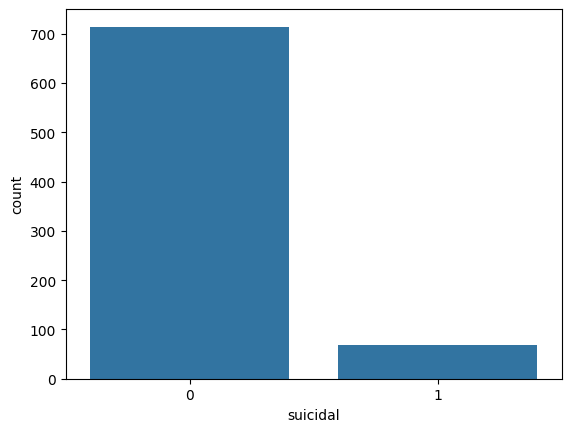

In [245]:
sns.countplot(x='suicidal', data=data) #counts the total number of unique occurence in the column: "Liked", from the data
plt.show() 

In [246]:
X = data.drop(columns=['anxiety_severity', 'depression_severity',  'suicidal']).values
y = data['suicidal'].values

In [271]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [281]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [282]:
count = 0
for data in range(len(y_pred)):
  if y_pred[data] != y_test[data]:
    count = count + 1

error_percentage = count/len(y_test) * 100
print(error_percentage)

6.369426751592357


In [283]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9363057324840764
